In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('UK Ecommerce.csv', encoding='ISO-8859-1', dtype={'CustomerID' : str})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.dropna(subset=['CustomerID','Description'], inplace=True)

In [6]:
drop_sc_list = ['POST','DOT','D','CRUK','C2','BANK CHARGES']
drop_sc_idx = df[df['StockCode'].isin(drop_sc_list)].index
print('Before drop:',len(df))
df.drop(drop_sc_idx, inplace=True)
print('After drop:',len(df))

Before drop: 401604
After drop: 400153


In [7]:
# 중복되는 행들
duplicated_rows = df[df.duplicated('StockCode', keep=False)]

# 중복되는 첫 번째 행의 값을 가져옴
first_duplicated_values = duplicated_rows.drop_duplicates('StockCode').set_index('StockCode')

# 중복되는 행들의 인덱스를 가져옴
duplicated_indices = duplicated_rows.index

# 중복되는 행들의 '특정 컬럼'을 첫 번째 중복 행의 값으로 채움
df.loc[duplicated_indices, 'Description'] = df.loc[duplicated_indices, 'StockCode'].map(first_duplicated_values['Description'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [8]:
df['Total_bills'] = df['Quantity'] * df['UnitPrice']
drop_idx = df[df['Total_bills']==0].index
df.drop(drop_idx, inplace=True)
df[df['Total_bills']<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
127,536381,22261,FELT EGG COSY WHITE RABBIT,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
128,536381,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
...,...,...,...,...,...,...,...,...,...
536572,581580,21803,CHRISTMAS TREE STAR DECORATION,2,2011-12-09 12:20:00,0.42,12748,United Kingdom,0.84
536573,581580,21809,CHRISTMAS HANGING TREE WITH BELL,2,2011-12-09 12:20:00,0.39,12748,United Kingdom,0.78
536574,581580,20974,12 PENCILS SMALL TUBE SKULL,1,2011-12-09 12:20:00,0.65,12748,United Kingdom,0.65
536578,581580,22695,WICKER WREATH SMALL,1,2011-12-09 12:20:00,0.59,12748,United Kingdom,0.59


In [9]:
total_transactions = df.groupby(['CustomerID'])['InvoiceNo'].nunique().reset_index()
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,Completed
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Completed
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Completed
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Completed
536640,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,Completed


In [10]:
df.insert(5, 'InvoiceMonth', df['InvoiceDate'].dt.strftime('%Y-%m'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12,2.55,17850,United Kingdom,15.30,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12,2.75,17850,United Kingdom,22.00,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed


# Recency

In [11]:
df_info = df.groupby(['CustomerID'])['InvoiceDate'].max().reset_index()
# 데이터셋에서 가장 마지막 날짜
most_recent_date = df['InvoiceDate'].max()
df_info['Recent_Date'] = most_recent_date
# 구매자의 가장 최근 구매 날짜
df_info['Recency'] = (df_info['Recent_Date'] - df_info['InvoiceDate']).dt.days
df_info.drop(['Recent_Date', 'InvoiceDate'], axis=1, inplace=True)
df_info.reset_index()
df_info.head()

,CustomerID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


# Monetary, Frequency

In [12]:
# 총 구매액, 총수량, 총 구매횟수
df_info_M = df.groupby(['CustomerID']).agg({'Total_bills' : 'sum', 'InvoiceNo' : lambda x : x.nunique()}).reset_index()
# 컬럼 변경
df_info_M.columns=['CustomerID', 'Monetary', 'Frequency']
df_info_M.head()

,CustomerID,Monetary,Frequency
0,12346,0.00,2
1,12347,4310.00,7
2,12348,1437.24,4
3,12349,1457.55,1
4,12350,294.40,1


In [13]:
# customer_df와 병합
df_info = pd.merge(df_info, df_info_M, on='CustomerID', how='left')
df_info.head()

,CustomerID,Recency,Monetary,Frequency
0,12346,325,0.00,2
1,12347,1,4310.00,7
2,12348,74,1437.24,4
3,12349,18,1457.55,1
4,12350,309,294.40,1


In [14]:
df_info = df_info[df_info['Monetary'] > 0]
len(df_info.index)

4322

In [15]:
def assign_score(value, boundaries):
    if value <= boundaries[0]:
        return 5
    elif value <= boundaries[1]:
        return 4
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 2
    else:
        return 1
        
def assign_score2(value, boundaries):
    if value <= boundaries[0]:
        return 1
    elif value <= boundaries[1]:
        return 2
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 4
    else:
        return 5


In [16]:
r_boundaries = np.percentile(df_info['Recency'], [20, 40, 60, 80])
r_boundaries

array([ 10. ,  30. ,  69. , 173.8])

In [17]:
df_info['R_score'] = df_info['Recency'].apply(lambda x : assign_score(x, r_boundaries))
df_info.head()

,CustomerID,Recency,Monetary,Frequency,R_score
1,12347,1,4310.00,7,5
2,12348,74,1437.24,4,2
3,12349,18,1457.55,1,4
4,12350,309,294.40,1,1
5,12352,35,1265.41,11,3


In [18]:
f_boundaries = np.percentile(df_info['Frequency'], [20, 40, 60, 80])
f_boundaries

array([1., 2., 4., 7.])

In [19]:
df_info['F_score'] = df_info['Frequency'].apply(lambda x : assign_score2(x, f_boundaries))
df_info.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score
1,12347,1,4310.00,7,5,4
2,12348,74,1437.24,4,2,3
3,12349,18,1457.55,1,4,1
4,12350,309,294.40,1,1,1
5,12352,35,1265.41,11,3,5


In [20]:
M_boundaries = np.percentile(df_info['Monetary'], [20, 40, 60, 80])
M_boundaries

array([ 242.302,  469.704,  905.404, 1999.954])

In [21]:
df_info['M_score'] = df_info['Monetary'].apply(lambda x : assign_score2(x, M_boundaries))
df_info.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score
1,12347,1,4310.00,7,5,4,5
2,12348,74,1437.24,4,2,3,4
3,12349,18,1457.55,1,4,1,4
4,12350,309,294.40,1,1,1,2
5,12352,35,1265.41,11,3,5,4


## MinMax Scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
df_ss = df_info[['Recency', 'Monetary', 'Frequency']]
X = MinMaxScaler().fit_transform(df_ss)

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

## 최적의 k개수 구하기

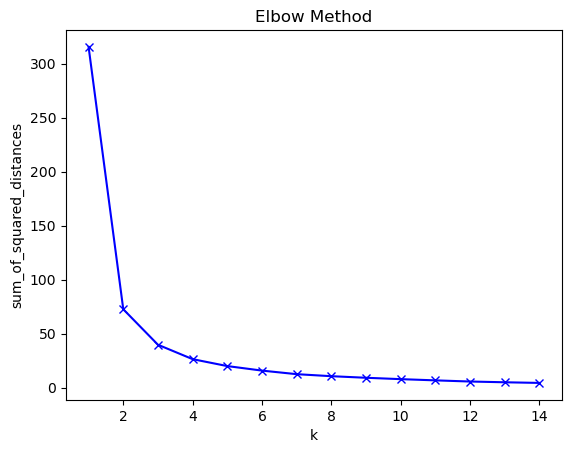

In [23]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

- Elbow Method : 군집의 개수를 정할 때, Elbow Method를 활용하여 군집을 늘려가면서 군집 내 변동성이 급감하는 군집 수를 찾음.
- 군집 내 변동성이 급감하였다는 것은 유사한 집단끼리 잘 묶였다는 의미

- 군집화를 정량적으로 평가할 수 있는 방법 중 하나로 실루엣 계수가 있다.
- 실루엣 계수의 평균값이 1일에 가까울 수록 군집화가 잘 되었다고 할 수 있다.
- 0에 가까운 경우는 군집 간 거리가 좁다는 의미로, 군집화가 잘 이루어지지 않음을 의미
- https://studying-haeung.tistory.com/10
- k = 3일때 실루엣 계수가 가장 높다.

In [24]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from matplotlib import rc
k_means = KMeans(n_clusters=3)
model = k_means.fit(X)
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.6476978889342075

In [25]:
kmeans_df = df_info
kmeans_df['Cluster'] = labels
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster
1,12347,1,4310.00,7,5,4,5,2
2,12348,74,1437.24,4,2,3,4,2
3,12349,18,1457.55,1,4,1,4,2
4,12350,309,294.40,1,1,1,2,1
5,12352,35,1265.41,11,3,5,4,2


In [26]:
df_ms = pd.DataFrame(X, columns=['Recency', 'Monetary', 'Frequency'])
df_ms['Cluster'] = list(kmeans_df['Cluster'])
df_ms.head()

,Recency,Monetary,Frequency,Cluster
0,0.002681,0.015466,0.024490,2
1,0.198391,0.005157,0.012245,2
2,0.048257,0.005230,0.000000,2
3,0.828418,0.001056,0.000000,1
4,0.093834,0.004541,0.040816,2


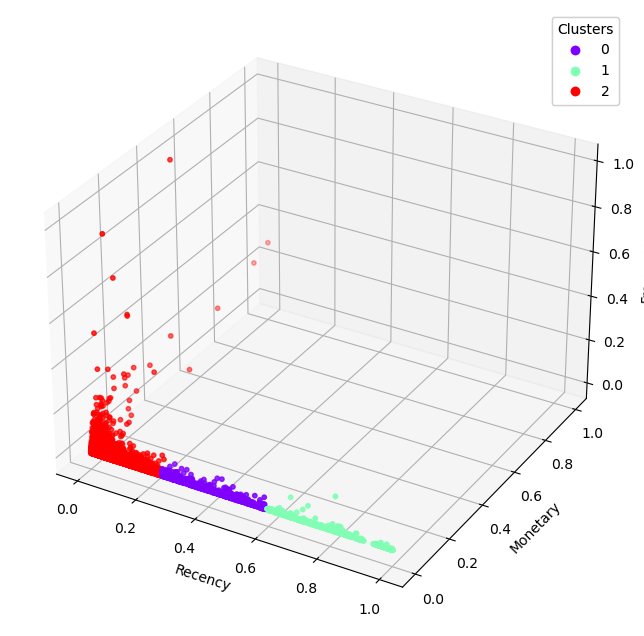

In [27]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_ms.iloc[:, 0], df_ms.iloc[:, 1], df_ms.iloc[:, 2], s=10, c = df_ms['Cluster'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
plt.show()

In [28]:
kmeans_df.groupby(['Cluster'])[['Recency','Monetary','Frequency']].mean()

,Recency,Monetary,Frequency
Cluster,,,
0,151.258706,715.031257,2.562189
1,291.914614,425.653005,1.573071
2,29.977656,2538.971400,6.489515


In [29]:
kmeans_df.groupby(['Cluster'])[['Recency','Monetary','Frequency']].std()

,Recency,Monetary,Frequency
Cluster,,,
0,38.385963,908.353687,2.022258
1,44.899404,1021.255649,1.778434
2,24.777646,9954.969996,10.886101


In [30]:
kmeans_df.groupby(['Cluster'])[['Recency','Monetary','Frequency']].count()

,Recency,Monetary,Frequency
Cluster,,,
0,804,804,804
1,609,609,609
2,2909,2909,2909


## 변동계수로 가중치 구하기

In [31]:
cv_r = []
cv_f = []
cv_m = []
# 각 그룹별 변동계수 = 표준변차 / 평균 구하기
for i in range(kmeans_df['Cluster'].nunique()):
    r = kmeans_df[kmeans_df['Cluster']==i]['Recency'].std() / kmeans_df[kmeans_df['Cluster']==i]['Recency'].mean() 
    f = kmeans_df[kmeans_df['Cluster']==i]['Frequency'].std() / kmeans_df[kmeans_df['Cluster']==i]['Frequency'].mean() 
    m = kmeans_df[kmeans_df['Cluster']==i]['Monetary'].std() / kmeans_df[kmeans_df['Cluster']==i]['Monetary'].mean() 
    cv_r.append(r)
    cv_f.append(f)
    cv_m.append(m)
    
# 각 그룹별 변동계수 = 표준변차 / 평균 구하기   
w1 = min(cv_r) / (cv_r[0] + cv_r[1] + cv_r[2])
w2 = min(cv_f) / (cv_f[0] + cv_f[1] + cv_f[2])
w3 = min(cv_m) / (cv_m[0] + cv_m[1] + cv_m[2])

# w1, w2, w3의 합을 1로 만들어주기 위해 세 값을 더한 후 각각의 값을 구함
w1_r = w1 / (w1 + w2 + w3)
w2_f = w2 / (w1 + w2 + w3)
w3_m = w3 / (w1 + w2 + w3)
w1_r, w2_f, w3_m

(0.24370568417225957, 0.4290296918836615, 0.3272646239440789)

In [32]:
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster
1,12347,1,4310.00,7,5,4,5,2
2,12348,74,1437.24,4,2,3,4,2
3,12349,18,1457.55,1,4,1,4,2
4,12350,309,294.40,1,1,1,2,1
5,12352,35,1265.41,11,3,5,4,2


In [33]:
kmeans_df['rfm_score'] = (w1_r * kmeans_df['R_score'] + w2_f * kmeans_df['F_score'] + w3_m * kmeans_df['M_score']) / 5 * 100
kmeans_df['rfm_score'].describe()

count    4322.000000
mean       57.454079
std        24.878038
min        20.000000
25%        35.125886
50%        55.125886
75%        78.328821
max       100.000000
Name: rfm_score, dtype: float64

In [34]:
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster,rfm_score
1,12347,1,4310.00,7,5,4,5,2,91.419406
2,12348,74,1437.24,4,2,3,4,2,61.671179
3,12349,18,1457.55,1,4,1,4,2,54.258218
4,12350,309,294.40,1,1,1,2,1,26.545292
5,12352,35,1265.41,11,3,5,4,2,83.706480


In [35]:
kmeans_df.groupby(['rfm_score'])['Cluster'].count()

rfm_score
20.000000     302
24.874114     129
26.545292     160
28.580594      56
29.748227     118
             ... 
90.251773      71
91.419406      58
93.454708      57
95.125886     152
100.000000    324
Name: Cluster, Length: 115, dtype: int64

- 총 115개의 점수 범위

In [36]:
s_boundaries = np.percentile(kmeans_df['rfm_score'], [20, 40, 60, 80])
s_boundaries

array([33.09058496, 46.54529248, 64.87411368, 84.64058698])

In [37]:
def assign_score_f(value, boundaries):
    if value <= boundaries[0]:
        return 'Bronze'
    elif value <= boundaries[1]:
        return 'Silver'
    elif value <= boundaries[2]:
        return 'Gold'
    elif value <= boundaries[3]:
        return 'Platinum'
    else:
        return 'Diamond'

In [38]:
kmeans_df['membership'] = kmeans_df['rfm_score'].apply(lambda x : assign_score_f(x, s_boundaries))

In [39]:
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster,rfm_score,membership
1,12347,1,4310.00,7,5,4,5,2,91.419406,Diamond
2,12348,74,1437.24,4,2,3,4,2,61.671179,Gold
3,12349,18,1457.55,1,4,1,4,2,54.258218,Gold
4,12350,309,294.40,1,1,1,2,1,26.545292,Bronze
5,12352,35,1265.41,11,3,5,4,2,83.706480,Platinum


In [40]:
grade_monetary = kmeans_df.groupby(['membership'])['Monetary'].sum().sort_values() / kmeans_df['Monetary'].sum() * 100

<Axes: xlabel='membership', ylabel='count'>

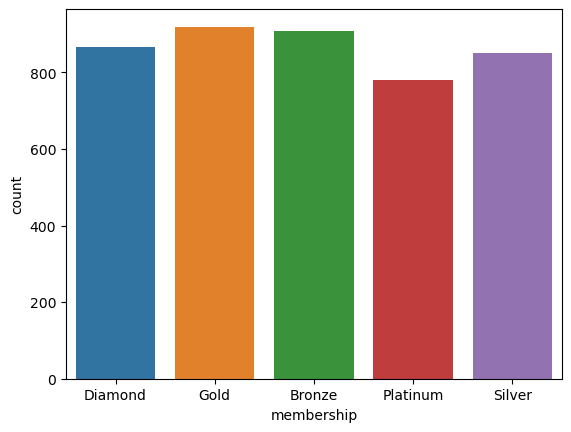

In [41]:
sns.countplot(x='membership', data=kmeans_df)

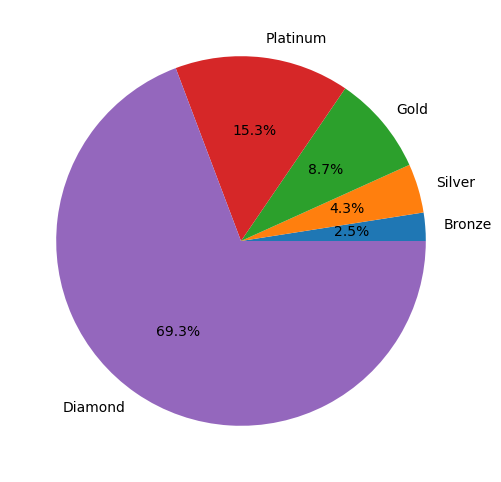

In [42]:
labels = grade_monetary.index
sizes = grade_monetary.values
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.1f%%');

In [43]:
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster,rfm_score,membership
1,12347,1,4310.00,7,5,4,5,2,91.419406,Diamond
2,12348,74,1437.24,4,2,3,4,2,61.671179,Gold
3,12349,18,1457.55,1,4,1,4,2,54.258218,Gold
4,12350,309,294.40,1,1,1,2,1,26.545292,Bronze
5,12352,35,1265.41,11,3,5,4,2,83.706480,Platinum


In [44]:
grade_df = kmeans_df.groupby(['membership']).agg({'R_score' : 'mean', 'F_score' : 'mean', 'M_score' : 'mean', 'CustomerID' : 'count'}).reset_index()
grade_df.head()

,membership,R_score,F_score,M_score,CustomerID
0,Bronze,1.502756,1.061742,1.389195,907
1,Diamond,4.479769,4.771098,4.781503,865
2,Gold,3.051143,2.601741,2.923830,919
3,Platinum,3.542308,3.611538,3.985897,780
4,Silver,2.567568,1.612221,2.084606,851


In [45]:
# 그룹별로 R_score, F_score, M_score의 평균과 CustomerID의 수를 계산
grade_df = kmeans_df.groupby(['membership']).agg({
    'R_score': 'mean',
    'F_score': 'mean',
    'M_score': 'mean',
    'CustomerID': 'count'
}).reset_index()

# 결과 출력
print(grade_df)


  membership   R_score   F_score   M_score  CustomerID
0     Bronze  1.502756  1.061742  1.389195         907
1    Diamond  4.479769  4.771098  4.781503         865
2       Gold  3.051143  2.601741  2.923830         919
3   Platinum  3.542308  3.611538  3.985897         780
4     Silver  2.567568  1.612221  2.084606         851


In [46]:
grade_df.head

<bound method NDFrame.head of   membership   R_score   F_score   M_score  CustomerID
0     Bronze  1.502756  1.061742  1.389195         907
1    Diamond  4.479769  4.771098  4.781503         865
2       Gold  3.051143  2.601741  2.923830         919
3   Platinum  3.542308  3.611538  3.985897         780
4     Silver  2.567568  1.612221  2.084606         851>